# L08 - ANN

## Author - Rodolfo Lerma

# Problem:
For this assignment you will start from the perceptron neural network notebook (Simple Perceptron Neural Network.ipynb) and modify the python code to make it into a multi-layer neural network classifier. To test your system, use the RedWhiteWine.csv file with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system. To review the data attributes, download the L08_WineQuality.pdf.


# Abstract:
Mackenzie has a wine bottling factory and recently attended a followup symposium on deep learning and has returned with fascinating ideas to build neural networks to perform classification tasks. She had the idea of building a red-white wine classifier so that the bottle labels can be automatically generated. She approached your team, and suggested that you build a red-white wine classifier as a modified simple perceptron.

The analysis is is divided the following way:

### Data Exploration
- **Visual Exploration**
- **Formatting the variables**
    - One hot encoding
    - Normalizing features from 0-1


### Analysis
- **Logistic (Sigmoid) Function**
- **Initialize Parameters**
- **Forward Propagation**
- **Backpropagation**
- **Gradient Descent**
- **Running experiment**
    - Hyperparamters
- **Results**

        
### Summary of Models Performance

# Data Exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'RedWhiteWine.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df.shape

(6497, 13)

It is possible to see that the data frame contains 13 columns (features) and 6497 rows (data points).

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                     int64
dtype: object

All the data is numeric, and also by looking at the type it seems that no missing points are present.

## Visual Exploration

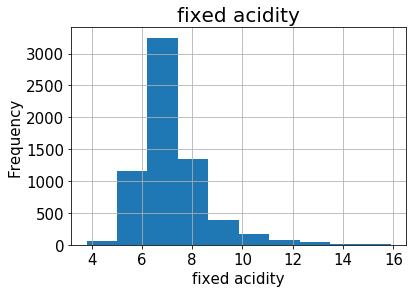

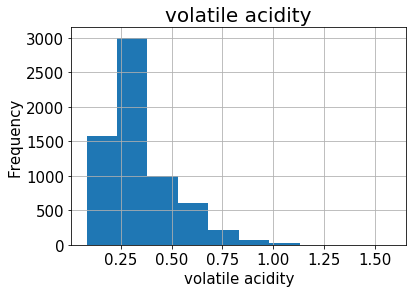

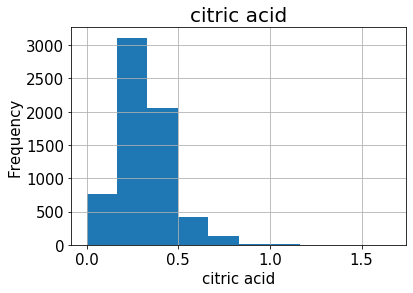

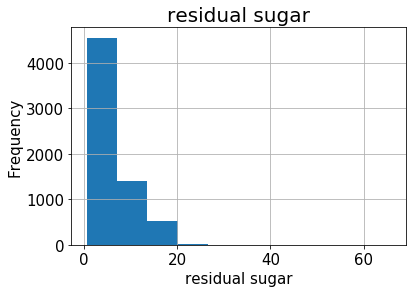

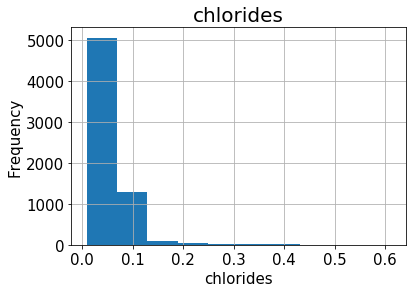

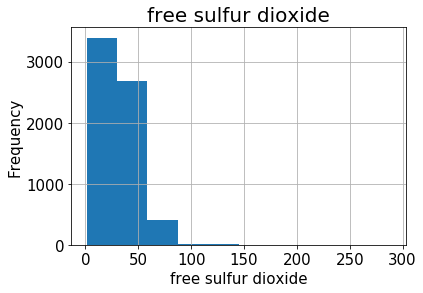

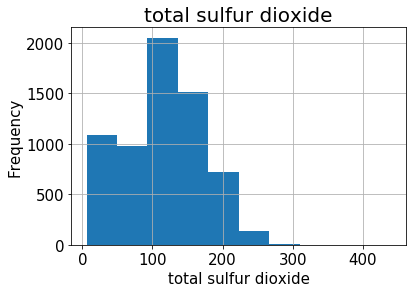

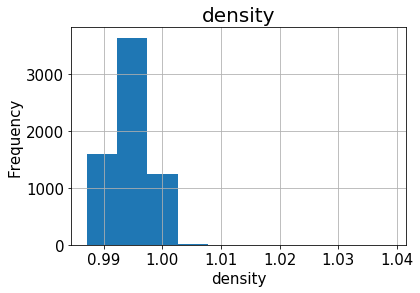

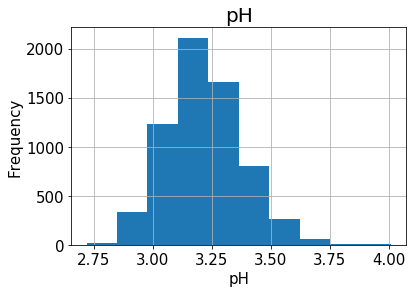

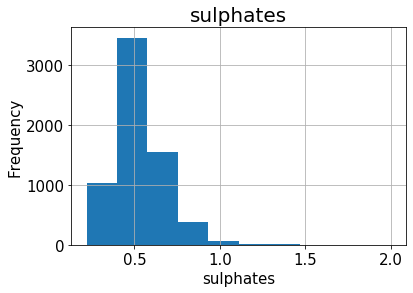

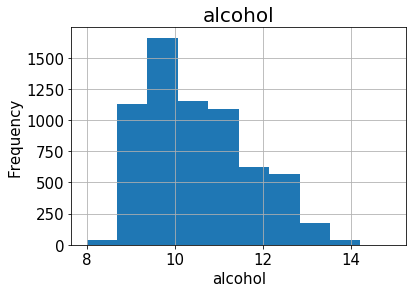

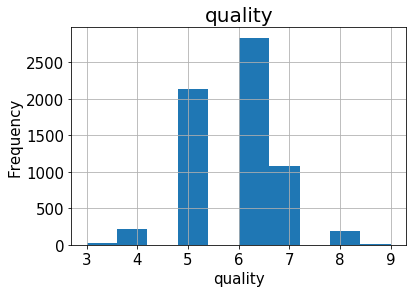

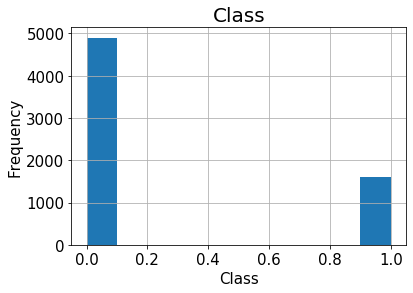

In [6]:
for i in df:
    df[i].hist(figsize = (6,4))
    plt.xlabel(i, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.title(i, fontsize = 20)
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    plt.grid(True)
    plt.show()

In [7]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [8]:
df['Class'].value_counts()

0    4898
1    1599
Name: Class, dtype: int64

It is possible to see from the plot above and the numbers that even though there is a difference between the number of values from each class (0 or 1) the difference is in the same orden of magnitude, for that reason there is no need to include/performe a class imbalance.

## Formatting the variables

### One hot encoding

In [9]:
#Hot encoding protocol type to include the variable in the ML model
hot_encoded = ['quality']

for i in hot_encoded:
    for j in df[i].unique():
        df.loc[:,j] = (df.loc[:,i] == j).astype(int)

first_list = []
for i in hot_encoded:
    x = df[i].unique()
    y = x.tolist()
    first_list.append(y)
    
one_hot = []    
for sublist in first_list:
    for item in sublist:
        one_hot.append(item)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class,5,6,7,4,8,3,9
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1,0,0,0,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1,0,0,0,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1,0,0,0,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0,1,0,0,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1,0,0,0,0,0,0


In [11]:
features = df.columns.tolist()
features.remove('quality')
features.remove('Class')

variables = df[features]
target = df['Class']

### Normalizing features from 0-1

In [12]:
from sklearn import preprocessing

x = variables.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
variables_scaled = pd.DataFrame(x_scaled)

In [13]:
variables_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X = np.array(variables_scaled)
X = X.T

Y = np.array(target)

# Analysis

## Logistic (Sigmoid) Function

In [15]:
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))

## Initialize Parameters

In [16]:
# define the dimentions and set the weights to random numbers
def init_parameters(dim1, dim2, std=1e-1, random = True):
    if(random):
        return(np.random.random([dim1,dim2])*std)
    else:
        return(np.zeros([dim1,dim2]))

In [17]:
# n_0, m = np.shape(X)
# n_1 = 2
# W1 = init_parameters(n_1,n_0, True)
# B1 = init_parameters(n_1,1, True)

## Forward Propagation

In [18]:
# Single layer network: Forward Prop
# Passed in the weight vectors, bias vector, the input vector and the Y
def fwd_prop(W1,bias,X):
    Z1 = np.dot(W1,X) + bias#dot product of the weights and X + bias
    A1 = sigmoid(Z1)#Uses sigmoid to create a predicted vector
    return(A1)

## Backpropagation

In [19]:
#Single layer network: Backprop
def back_prop(A1,W1,bias,X,Y):
    m = np.shape(X)[1] #used the calculate the cost by the number of inputs -1/m
    #Cross entropy loss function
    cost = (-1/m)*np.sum(Y*np.log(A1) + (1-Y)*np.log(1-A1))#cost of error
    dZ1 = A1 - Y#subtract actual from pred weights
    dW1 = (1/m) * np.dot(dZ1, X.T)#calc new weight vector
    dBias = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)#calc new bias vector
    grads ={"dW1": dW1, "dB1":dBias}#Weight and bias vectors after backprop 
    return(grads,cost)

## Gradient Descent

In [20]:
# n_0, m = np.shape(X) #n_0: number of inputs (x's) & m: number of rows (data points)
# n_1 = 3 #number of nodes/neurons
    
# #Initialization of Weights (in this case we assumed just 1 hidden layer)
# #Input to hidden1
# W1 = init_parameters(n_1, n_0, True)
# B1 = init_parameters(n_1,1, True)

# #Hidden1 to Hidden2
# W2 = init_parameters(n_1, n_1, True)
# B2 = init_parameters(n_1,1, True)

# #Hidden2 to Output
# Wf = init_parameters(1, n_1, True)
# Bf = init_parameters(1,1, True)

# #################Forward####################
# #Input to hidden1
# A1 = fwd_prop(W1,B1,X)# get predicted vector

# #Hidden1 to hidden2
# #A1trans = A1.T
# A2 = fwd_prop(W2,B2,A1)# get predicted vector

# #Hidden2 to Output
# Af = fwd_prop(Wf,Bf,A2)

# #################Backward####################
# #Perceptor to hidden2
# m = np.shape(A2)[1] #Comming out of the hidden layer
# cost = (-1/m)*np.sum(Y*np.log(Af) + (1-Y)*np.log(1-Af))
# dZf = Af - Y
# dWf = (1/m) * np.dot(dZf, A2.T)
# dBiasf = (1/m) * np.sum(dZf, axis = 1, keepdims = True)

# #hidden2 to hidden1
# m = np.shape(A1)[1] #Comming out of the input
# prop2 = (Wf/(sum(sum(Wf))))
# dZ2 = prop2.T.dot(dZf)# This is the critical point (the error backpropagation)
# dW2 = (1/m) * np.dot(dZ2, A1.T)
# dBias2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)

# #hidden1 to input
# m = np.shape(X)[1] #Comming out of the input
# prop1 = (W2/(sum(sum(W2))))
# dZ1 = prop1.dot(dZ2)# This is the critical point (the error backpropagation)
# dW1 = (1/m) * np.dot(dZ1, X.T)
# dBias1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)

# ##################Update#####################
# #Update Weights
# learning_rate = 0.01
# W1 = W1 - learning_rate*dW1
# W2 = W2 - learning_rate*dW2
# Wf = Wf - learning_rate*dWf
# #Update Bias
# B1 = B1 - learning_rate*dBias1
# B2= B2 - learning_rate*dBias2
# Bf = Bf - learning_rate*dBiasf

Even though a generalization of the code would be more robust and also less lines for this assignment the code would be just for 3 particular cases in terms of hidden layers, zero hidden layers, 1 & 2. Also the number of neurons per layer would remain constant, understanding that the best approach would be to allow the user to set the number of neurons in each layer.

In [21]:
def grad_desc_cases(n_layers,num_epochs,learning_rate,n_1,X,Y):
    if n_layers == 0:
        n_0, m = np.shape(X)
        W1 = init_parameters(n_1, n_0, True)
        B1 = init_parameters(n_1,1, True)
        loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
        for i in np.arange(num_epochs):
            A1 = fwd_prop(W1,B1,X) # get predicted vector
            grads,cost = back_prop(A1,W1,B1,X,Y)# get gradient and the cost from BP 
            W1 = W1 - learning_rate*grads["dW1"]# update weight vector LR*gradient*[BP weights]
            B1 = B1 - learning_rate*grads["dB1"]# update bias LR*gradient[BP bias]
            loss_array[i] = cost # loss array gets cross ent values
            parameter = {"W1":W1,"B1":B1} # assign 
        return(parameter,loss_array)
    
#############################################################

    if n_layers == 1:
        n_0, m = np.shape(X) #n_0: number of inputs (x's) & m: number of rows (data points)
        #Initialization of Weights (in this case we assumed just 1 hidden layer)
        #Input to hidden1
        W1 = init_parameters(n_1, n_0, True)
        B1 = init_parameters(n_1,1, True)
        #Hidden to output
        Wf = init_parameters(1, n_1, True)
        Bf = init_parameters(1,1, True)
        loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
        for i in np.arange(num_epochs):
            #################Forward####################
            #Input to hidden1
            A1 = fwd_prop(W1,B1,X)# get predicted vector
            #Hidden 1 Out to final perceptor
            Af = fwd_prop(Wf,Bf,A1)
            #################Backward####################
            #Perceptor to Hidden 1
            m = np.shape(A1)[1] #Comming out of the hidden layer
            cost = (-1/m)*np.sum(Y*np.log(Af) + (1-Y)*np.log(1-Af))
            dZf = Af - Y
            dWf = (1/m) * np.dot(dZf, A1.T)
            dBiasf = (1/m) * np.sum(dZf, axis = 1, keepdims = True)
            #Hidden 1 to Input
            m = np.shape(X)[1] #Comming out of the input
            prop1 = (Wf/(sum(sum(Wf))))
            dZ1 = prop1.T * dZf# This is the critical point (the error backpropagation)
            dW1 = (1/m) * np.dot(dZ1, X.T)
            dBias1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
            ##################Update#####################
            #Update Weights and Bias
            W1 = W1 - learning_rate*dW1
            Wf = Wf - learning_rate*dWf
            B1 = B1 - learning_rate*dBias1
            Bf = Bf - learning_rate*dBiasf
            loss_array[i] = cost
            parameter = {"W1":W1,"Wf":Wf,"B1":B1,"Bf":Bf}
        return(parameter,loss_array)
    
#############################################################

    if n_layers == 2:
        n_0, m = np.shape(X) #n_0: number of inputs (x's) & m: number of rows (data points)
        n_1 = 3 #number of nodes/neurons
        #Initialization of Weights (in this case we assumed just 1 hidden layer)
        #Input to hidden1
        W1 = init_parameters(n_1, n_0, True)
        B1 = init_parameters(n_1,1, True)
        #Hidden1 to Hidden2
        W2 = init_parameters(n_1, n_1, True)
        B2 = init_parameters(n_1,1, True)
        #Hidden2 to Output
        Wf = init_parameters(1, n_1, True)
        Bf = init_parameters(1,1, True)
        loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
        for i in np.arange(num_epochs):
            #################Forward####################
            #Input to hidden1
            A1 = fwd_prop(W1,B1,X)# get predicted vector
            #Hidden1 to hidden2
            A2 = fwd_prop(W2,B2,A1)# get predicted vector
            #Hidden2 to Output
            Af = fwd_prop(Wf,Bf,A2)
            #################Backward####################
            #Perceptor to hidden2
            m = np.shape(A2)[1] #Comming out of the hidden layer
            cost = (-1/m)*np.sum(Y*np.log(Af) + (1-Y)*np.log(1-Af))
            dZf = Af - Y
            dWf = (1/m) * np.dot(dZf, A2.T)
            dBiasf = (1/m) * np.sum(dZf, axis = 1, keepdims = True)
            #hidden2 to hidden1
            m = np.shape(A1)[1] #Comming out of the input
            prop2 = (Wf/(sum(sum(Wf))))
            dZ2 = prop2.T.dot(dZf)# This is the critical point (the error backpropagation)
            dW2 = (1/m) * np.dot(dZ2, A1.T)
            dBias2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
            #hidden1 to input
            m = np.shape(X)[1] #Comming out of the input
            prop1 = (W2/(sum(sum(W2))))
            dZ1 = prop1.dot(dZ2)# This is the critical point (the error backpropagation)
            dW1 = (1/m) * np.dot(dZ1, X.T)
            dBias1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
            ##################Update#####################
            #Update Weights
            W1 = W1 - learning_rate*dW1
            W2 = W2 - learning_rate*dW2
            Wf = Wf - learning_rate*dWf
            #Update Bias
            B1 = B1 - learning_rate*dBias1
            B2= B2 - learning_rate*dBias2
            Bf = Bf - learning_rate*dBiasf
            loss_array[i] = cost  
            parameter = {"W1":W1,"W2":W2,"Wf":Wf,"B1":B1,"B2":B2,"Bf":Bf}
        return(parameter,loss_array)

## Running the Experiment

For simplicity reason in this example just some particular cases will be explored. Ideally a full or random grid search should be done to find the best hyperparameters.

### Hyperparameters

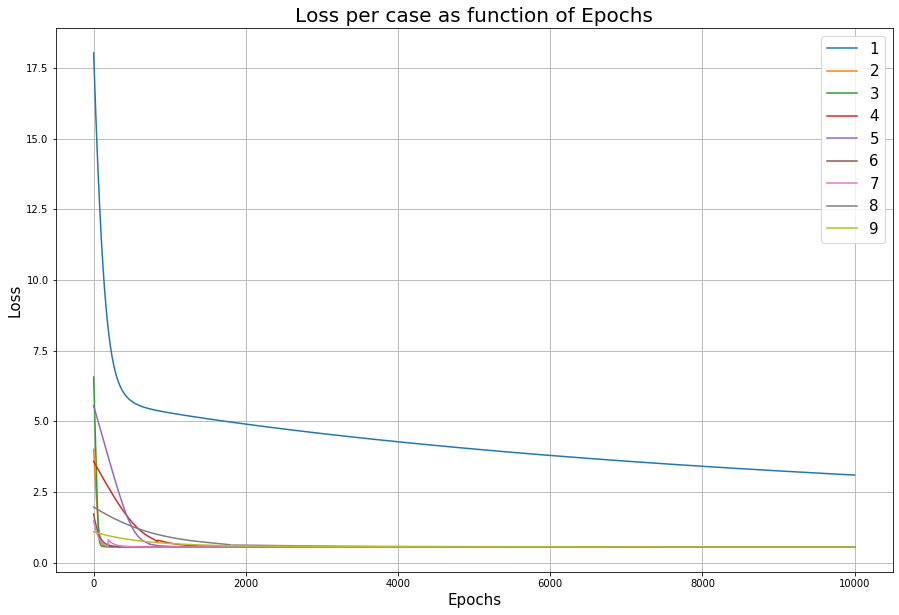

In [55]:
# grad_desc_cases(n_layers,num_epochs,learning_rate,n_1,X,Y)
# num_layers = [0,1,2]
# num_epochs = 1000
# learning_rate = [0.01, 0.001]
# n_neurons = [10,20]

case1 = [0,10000,0.01,10]
case2 = [1,10000,0.01,10]
case3 = [1,10000,0.01,20]
case4 = [1,10000,0.001,10]
case5 = [1,10000,0.001,20]
case6 = [2,10000,0.01,10]
case7 = [2,10000,0.01,20]
case8 = [2,10000,0.001,10]
case9 = [2,10000,0.001,20]
opt = [case1,case2,case3,case4,case5,case6,case7,case8,case9]

figure(figsize=(15, 10))
for i in range(len(opt)):
    params, loss_array = grad_desc_cases(opt[i][0],opt[i][1],opt[i][2],opt[i][3], X, Y)
    #figure(figsize=(12, 8))
    plt.plot(loss_array, label = i+1)
    plt.title('Loss per case as function of Epochs',fontsize = 20)
    plt.legend(loc='upper right', fontsize=15)
    plt.xlabel("Epochs", fontsize = 15)
    plt.ylabel("Loss", fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    #label_num += 1
    
  #print(loss_array[num_epochs-1])

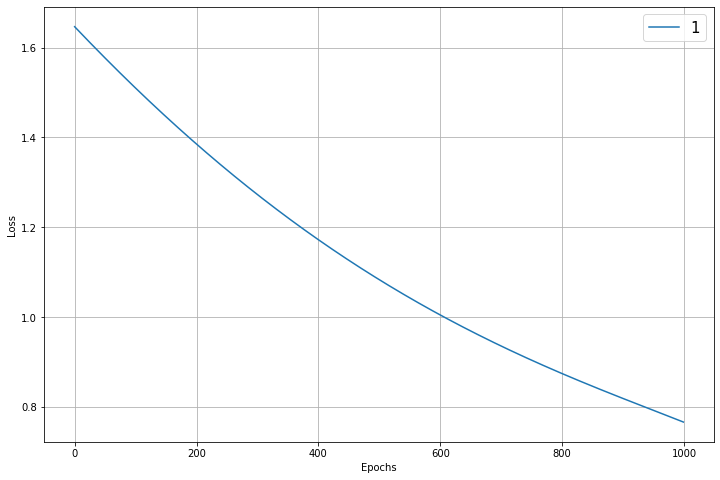

In [32]:
params, loss_array = grad_desc_cases(0,100,0.001,20,X,Y)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0) #Set default plot sizes
plt.rcParams['image.interpolation'] = 'nearest' #Use nearest neighbor for rendering

from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_array, label = '1')
plt.legend(loc='upper right', fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

## Results

# Summary of Findings:

- Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
- Use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network
- Be able to adjust the following between experiments:
    - Learning Rate
    - Number of epochs
    - Depth of architecture—number of hidden layers between the input and output layers
    - Number of nodes in a hidden layer—width of the hidden layers (optional) Momentum
- Determine what the best neural network structure and hyperparameter settings results in the best predictive capability